In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import math
import os
import sys
from ggw import *
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
%matplotlib widget
%matplotlib inline
# !pip install geomloss
# !pip install scikit-learn

# Preprocess

In [30]:
data_2_path = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_2.csv'
data_5_path = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_5.csv'
data_0_path = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_0.csv'
data_8_path = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_8.csv'


df_2 = pd.read_csv(data_2_path,encoding='latin-1', header=None) 
# print(df_2.head(10))

df_5 = pd.read_csv(data_5_path,encoding='latin-1', header=None) 
# print(df_5.head(10))

df_0 = pd.read_csv(data_0_path,encoding='latin-1', header=None) 
print(df_0.head(10))

df_8 = pd.read_csv(data_8_path,encoding='latin-1', header=None) 
print(df_8.head(10))

       0   1
0  ï»¿18   6
1     20   9
2     19  11
3     12   6
4     15   9
5     13   7
6     12  23
7      9  21
8     20  16
9     13  16
       0   1
0  ï»¿15  11
1     23  16
2     23  14
3      9  21
4     22  16
5      9  17
6     19   6
7     10  15
8     16  14
9      6   7


In [31]:
df_2.iloc[0,0] = 10
df_2.columns = ['x','y']
df_2['x'] = df_2['x'].astype(int)
df_2.dtypes

df_5.iloc[0,0] = 6
df_5.columns = ['x','y']
df_5['x'] = df_5['x'].astype(int)
df_5.dtypes

df_0.iloc[0,0] = 18
df_0.columns = ['x','y']
df_0['x'] = df_0['x'].astype(int)
df_0.dtypes

df_8.iloc[0,0] = 15
df_8.columns = ['x','y']
df_8['x'] = df_8['x'].astype(int)
df_8.dtypes
print(df_2.shape)
print(df_5.shape)

(273, 2)
(270, 2)


In [32]:
df_2_chosen = df_2.head(270)
print(df_2_chosen.shape)

df_5_chosen = df_5.head(270)
print(df_5_chosen.shape)

(270, 2)
(270, 2)


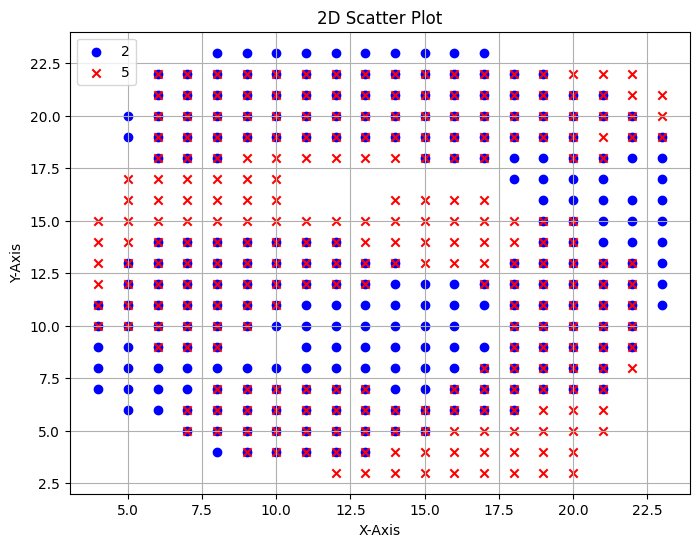

In [33]:
plt.figure(figsize=(8, 6))
# test = np.concatenate((df_train_arr, df_test_arr), axis=0)
plt.scatter(df_2_chosen['x'],df_2_chosen['y'], color='blue', marker='o', label='2')
plt.scatter(df_5_chosen['x'],df_5_chosen['y'], color='red', marker='x', label='5')
plt.title('2D Scatter Plot')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()
plt.grid(True)
plt.show()

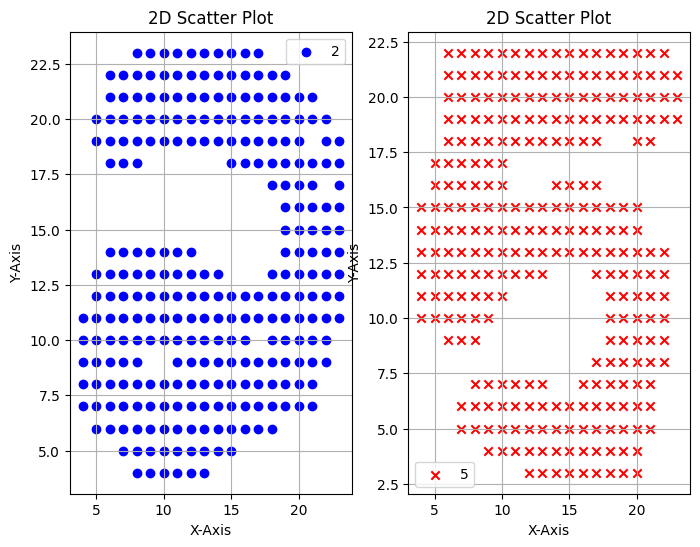

In [34]:
plt.figure(figsize=(8, 6))
# test = np.concatenate((df_train_arr, df_test_arr), axis=0)

plt.subplot(1,2,1)
plt.scatter(df_2_chosen['x'],df_2_chosen['y'], color='blue', marker='o', label='2')
# plt.scatter(df_5_chosen['x'],df_5_chosen['y'], color='red', marker='x', label='5')
plt.title('2D Scatter Plot')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()
plt.grid(True)

ax = plt.subplot(1,2,2)
ax.scatter(df_5_chosen['x'],df_5_chosen['y'], color='red', marker='x', label='5')
ax.set_title('2D Scatter Plot')
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.legend()
ax.grid(True)
plt.show()

Iter |Bound gap
----------------------
    0|1.992685e+10
    1|2.266376e+09
    2|2.156267e+09
    3|1.930290e+09
    4|1.436316e+09
    5|1.056895e+09
    6|1.045617e+09
    7|8.789524e+08
    8|7.982276e+08
    9|6.165691e+08
   10|6.148932e+08
   11|5.400076e+08
   12|4.844402e+08
   13|4.493938e+08
   14|3.754367e+08
   15|3.406628e+08
   16|3.237967e+08
   17|3.060117e+08
   18|2.887174e+08
   19|2.715465e+08
   20|2.531407e+08
   21|2.505616e+08
   22|2.284552e+08
   23|2.218982e+08
   24|2.187068e+08
   25|2.134754e+08
   26|1.905197e+08
   27|1.856696e+08
   28|1.849007e+08
   29|1.779302e+08
   30|1.520066e+08
   31|1.495572e+08
   32|1.448646e+08
   33|1.355773e+08
   34|1.320235e+08
   35|1.262674e+08
   36|1.252928e+08
   37|1.151485e+08
   38|1.135603e+08
   39|1.016417e+08
   40|9.804941e+07
   41|8.346094e+07
   42|7.820579e+07
   43|7.791492e+07
   44|7.183851e+07
   45|7.176724e+07
   46|6.809176e+07
   47|6.447276e+07
   48|6.374941e+07
   49|6.045111e+07
   50|5.730

/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_2726/1275791921.py:135: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_2726/1275791921.py:144: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_2726/1275791921.py:151: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


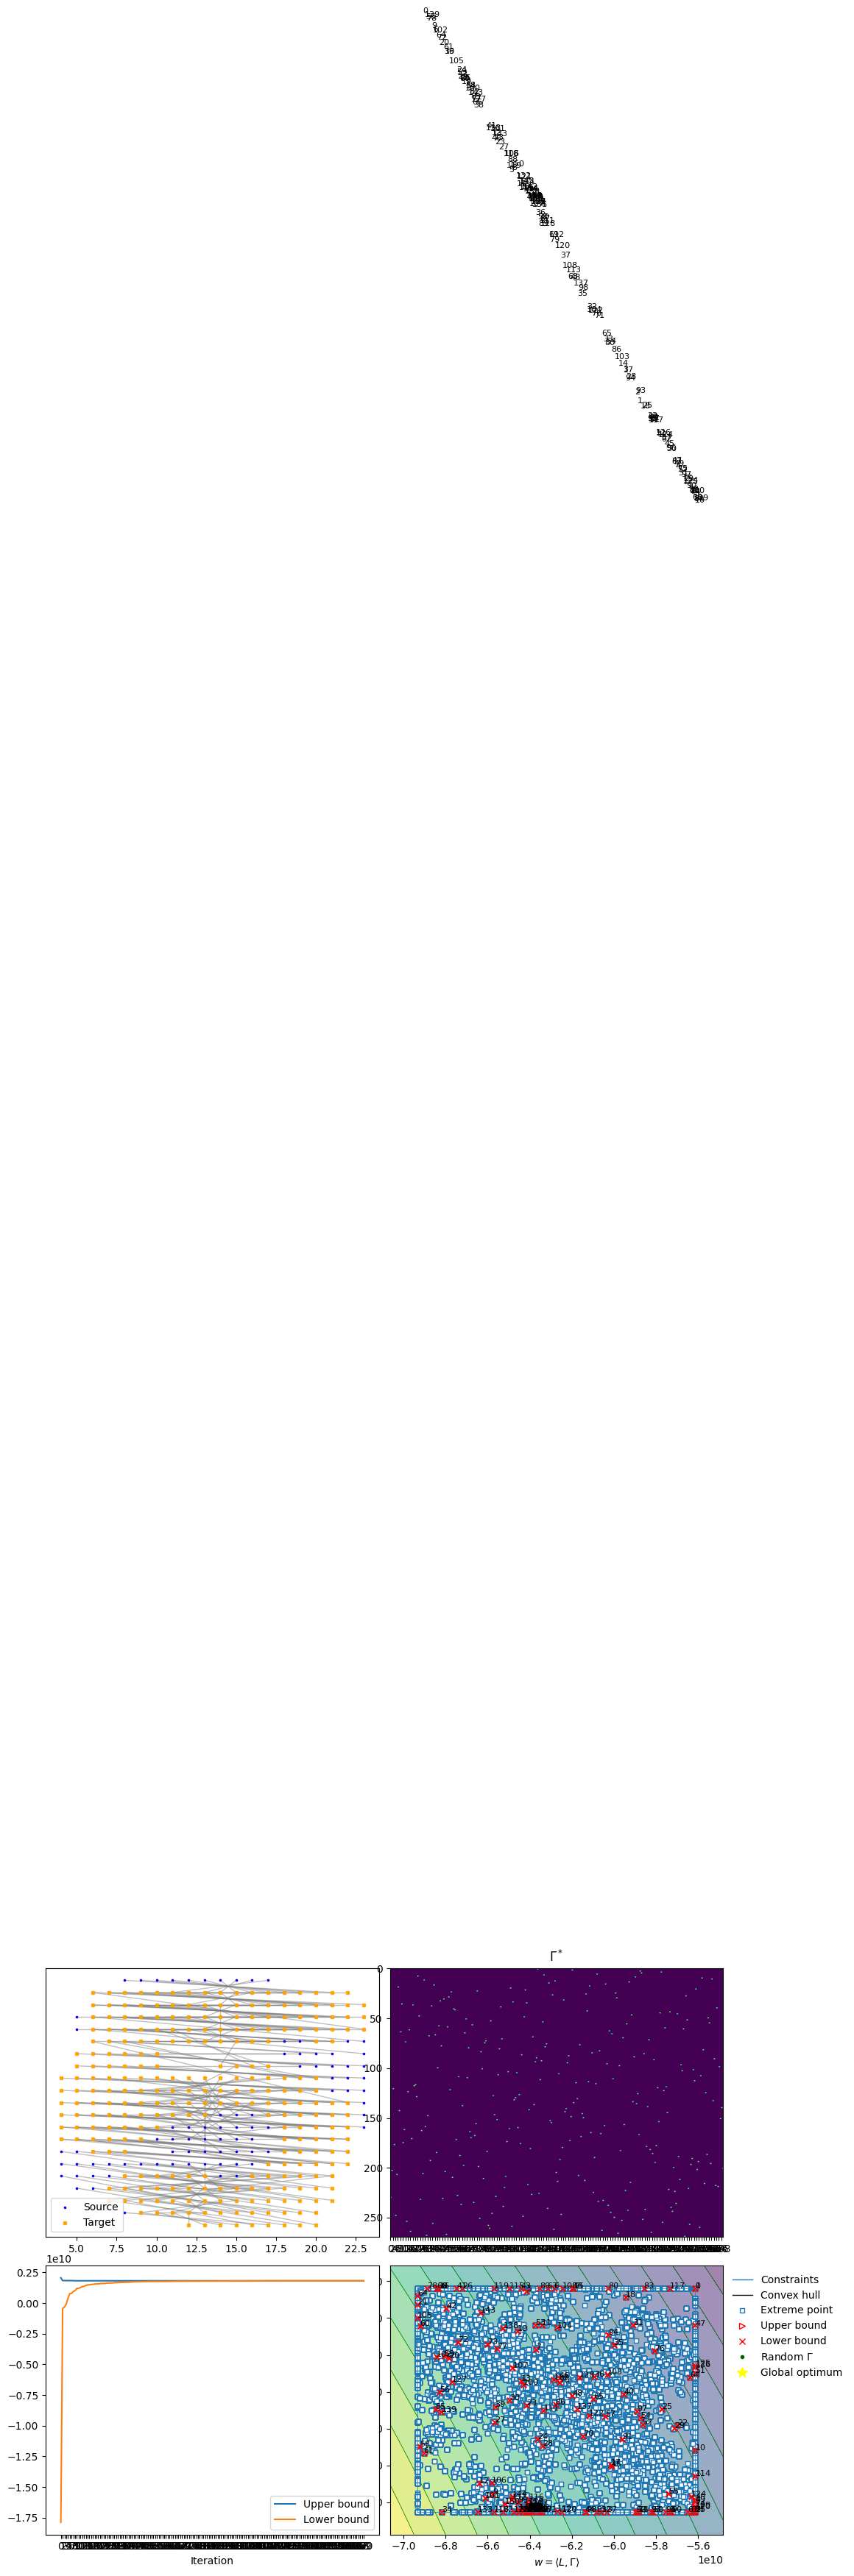

In [35]:
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D


# datas = [df_jump1, df_jump2, df_punch1, df_punch2, df_sit, df_wave]

X = df_2_chosen.values
Y = df_5_chosen.values

P_ggw,logs = gw_global(X,Y,epsilon=1e-6,verbose=True,IterMax=500,log=True)

# scatter plot X and Y
plt.figure(figsize=(9.5,8))
plt.subplot(2,2,1)
plt.scatter(X[:,0], X[:,1], color='blue', label='Source', marker='.', s=10)
plt.scatter(Y[:,0], Y[:,1], color='orange', label='Target', marker='X', s=10)

# plt.tight_layout()
# plt.show()

for i in range(len(X)):
    for j in range(len(Y)):
        if P_ggw[i,j]>0:
            plt.plot([X[i][0], Y[j][0]], [X[i][1], Y[j][1]],color='gray',zorder=-4,linewidth=1,alpha=0.5)
plt.legend()
plt.yticks([])
plt.tight_layout()

# optimization plots with the bounding box and linear constraints
ax4 = plt.subplot(2,2,4)

# BOUNDING BOX
for i,E in enumerate(logs['E_cache']):
    plt.scatter(E[:,0],E[:,1],alpha=1,marker='s',facecolor='white',s=20,label=f'iter {i}',color='C0')

# c_cache.append((lower_bounds,upper_bounds)) 
for i,c in enumerate(logs['c_cache']):
    if i == 0:
        lower_bounds,upper_bounds=c
        width = upper_bounds[0] - lower_bounds[0]
        height = upper_bounds[1] - lower_bounds[1]
        plt.plot([lower_bounds[0],upper_bounds[0],upper_bounds[0],lower_bounds[0],lower_bounds[0]],[lower_bounds[1],lower_bounds[1],upper_bounds[1],upper_bounds[1],lower_bounds[1]],label='Bounding box',linewidth=0.5,color='C0')
    else:
        A,b=c
        if A[1] == 0:
            plt.plot([b,b],[lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height],linewidth=0.5,color='C0')
        else:
            x = np.array([lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width])
            y = (b - A[0] * x)/A[1]
            plt.plot(x,y,linewidth=0.5,color='C0')


plt.xlim(lower_bounds[0]-0.1*width,upper_bounds[0]+0.1*width)
plt.ylim(lower_bounds[1]-0.1*height,upper_bounds[1]+0.1*height)

for i,E0 in enumerate(logs['E0_cache']):
    plt.scatter(E0[0],E0[1],marker='x',s=30,color='red')
    plt.text(E0[0],E0[1],f'{i}',fontsize=8)    

L = logs['L']

for i,P in enumerate(logs['Pi_cache'][:-1]):
    W = np.sum(2 * X.T @ P @ Y)
    w = np.sum(L*P)
    plt.scatter(w,W,color='red',marker='>',facecolor='white',s=50)
    plt.text(w,W,f'{i}',fontsize=8)  

P = logs['Pi_cache'][-1]
W = np.sum(2 * X.T @ P @ Y)
w = np.sum(L*P)
plt.scatter(w,W,color='yellow',marker='*',facecolor='yellow',s=100,zorder=15)

Ws = [W]
ws = [w]
M = 1000
for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    P1 = mat
    i = np.random.choice(len(logs['Pi_cache']))
    P = logs['Pi_cache'][i]
    a = (np.random.choice(5)/5)**3
    Pi = (a) * P + (1-a) * P1
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)
    
for _ in range(M):
    n = len(X)
    perm = np.random.permutation(n)
    mat = np.zeros((n, n), dtype=int)
    for i in range(n):
        mat[i, perm[i]] = 1
    Pi = mat
    W = np.sum(2 * X.T @ Pi @ Y)
    w = np.sum(L*Pi)
    Ws.append(W)
    ws.append(w)
    
points = np.array(list(zip(ws, Ws)))
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='k',zorder=-12,linewidth=1)
    plt.scatter(points[simplex, 0], points[simplex, 1],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

plt.scatter(ws[::10],Ws[::10],marker='o',s=10,zorder=-15,edgecolors=[(0, 0.5, 0, 1)],facecolors=[(0, 0.5, 0, 1)])

x = np.linspace(lower_bounds[0]-0.1*width, upper_bounds[0]+0.1*width, 400)
y = np.linspace(lower_bounds[1]-0.1*height, upper_bounds[1]+0.1*height, 400)
x, y = np.meshgrid(x, y)
z = -x-y**2

plt.contour(x, y, z, levels=20, colors='green', linewidths=0.5,zorder=-5) 
plt.contourf(x, y, z, levels=20,zorder=-10,alpha=0.5) 

plt.xlabel(r'$w = \langle L,\Gamma \rangle$')
plt.ylabel(r'$W = 2X\Gamma Y^T$')


handles = [
    Line2D([0], [0], color='C0', lw=1, label='Constraints'),
    Line2D([0], [0], color='k', lw=1, label='Convex hull'),
    Line2D([0], [0], marker='s',lw=0,color='C0',markerfacecolor='white',markersize=5, label='Extreme point'),
    Line2D([0], [0], marker='>',lw=0,color='red',markersize=6, markerfacecolor='white',label='Upper bound'),
    Line2D([0], [0], marker='x',lw=0,color='red',markersize=6, label='Lower bound'),
    Line2D([0], [0], marker='o',lw=0,color='darkgreen',markersize=3, label='Random $\Gamma$'),
    Line2D([0], [0], marker='*',lw=0,color='yellow',markersize=10, label='Global optimum')
]

ax4.legend(handles=handles,loc='upper left', bbox_to_anchor=(1,1),frameon=False)
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(range(logs['niter']),logs['u_cache'],label='Upper bound')
plt.plot(range(logs['niter']),logs['l_cache'],label='Lower bound')
plt.xticks(range(logs['niter']))
           
plt.xlabel('Iteration')
plt.legend()
plt.tight_layout()

ax2 = plt.subplot(2,2,2)
plt.imshow(P_ggw)
plt.xticks(range(0,n,2))
plt.title("$\Gamma^*$")
ax2.set_aspect('auto')
plt.tight_layout()

# Performance Comparison between GGW (500 iter) and GW (5000 iter)

Loss(P_ggw) - Loss(P_gw): nan


/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_2726/3576332364.py:10: UserWarning: Input structure matrix consists of integers. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input structure matrix consists of floating point elements.
  P_gw = ot.gromov.gromov_wasserstein(C1, C2, p, q, 'square_loss', verbose=False, log=False,max_iter=5000)            # Shows that it does not converge in reasonable time
/var/folders/rg/6_hb8rjj4tlct__31r7vx4640000gp/T/ipykernel_2726/3576332364.py:50: RuntimeWarning: invalid value encountered in divide
  print(f'Loss(P_ggw) - Loss(P_gw): {gw_obj(C1,C2,P_ggw)-gw_obj(C1,C2,P_gw/np.max(P_gw)):.4e}')


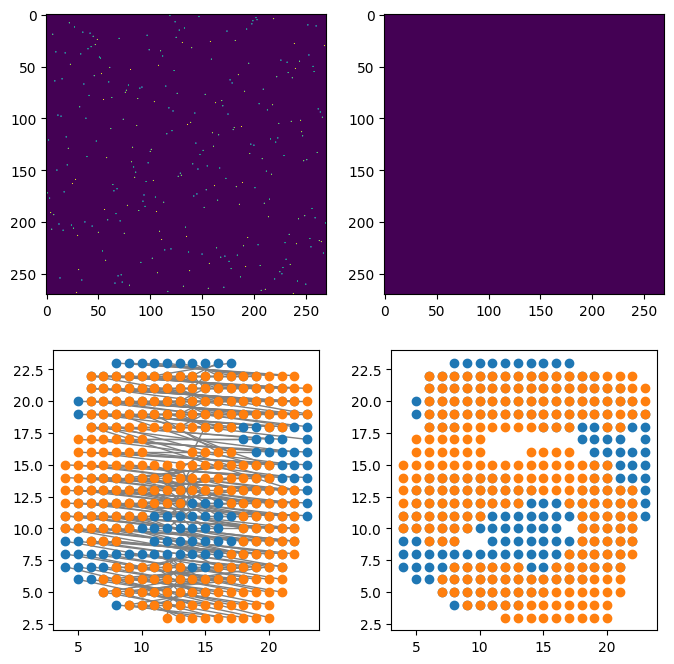

In [36]:
X = df_2_chosen.values
Y = df_5_chosen.values

P_ggw,logs = gw_global(X,Y,epsilon=1e-6,verbose=False,log=True)

p = ot.unif(len(X))
q = ot.unif(len(Y))
C1 = ot.dist(X,X)
C2 = ot.dist(Y,Y)
P_gw = ot.gromov.gromov_wasserstein(C1, C2, p, q, 'square_loss', verbose=False, log=False,max_iter=5000)            # Shows that it does not converge in reasonable time

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(P_ggw)


plt.subplot(2,2,2)
plt.imshow(P_gw)

plt.subplot(2,2,3)

plt.scatter(X[:,0],X[:,1],alpha=1)
plt.scatter(Y[:,0],Y[:,1],alpha=1)

P = P_ggw

for i in range(len(X)):
    for j in range(len(Y)):
        if P[i,j]>0:
            plt.plot([X[i,0],Y[j,0]],[X[i,1],Y[j,1]],linewidth=P[i,j]/np.max(P),color='grey',zorder=-1)
            
ax = plt.gca()
ax.set_aspect('equal')

plt.subplot(2,2,4)

plt.scatter(X[:,0],X[:,1],alpha=1)
plt.scatter(Y[:,0],Y[:,1],alpha=1)

P = P_gw

for i in range(len(X)):
    for j in range(len(Y)):
        if P[i,j]>0:
            plt.plot([X[i,0],Y[j,0]],[X[i,1],Y[j,1]],linewidth=P[i,j]/np.max(P),color='grey',zorder=-1)
            
ax = plt.gca()
ax.set_aspect('equal')

print(f'Loss(P_ggw) - Loss(P_gw): {gw_obj(C1,C2,P_ggw)-gw_obj(C1,C2,P_gw/np.max(P_gw)):.4e}')

# K-means with Gromov-Wasserstein Distance

In [37]:
df_0_chosen = df_0.head(270)
df_8_chosen = df_8.head(270)

additional data

In [38]:
# df_2_chosen.head(47)

In [39]:
data_2_path_2 = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_2_2.csv'
df_2_2 = pd.read_csv(data_2_path_2,encoding='latin-1', header=None) 
df_2_2.iloc[0,0] = 5
df_2_2.columns = ['x','y']
df_2_2['x'] = df_2_2['x'].astype(int)
df_2_2_chosen = df_2_2.head(270)
# df_2_2_chosen.tail(5)

In [40]:
data_2_path_3 = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_2_3.csv'
df_2_3 = pd.read_csv(data_2_path_3,encoding='latin-1', header=None) 
df_2_3.iloc[0,0] = 10
df_2_3.columns = ['x','y']
df_2_3['x'] = df_2_3['x'].astype(int)
df_2_3_chosen = df_2_3.head(270)
# df_2_3_chosen.tail(5)

In [41]:
data_3_path_1 = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_3_1.csv'
df_3_1 = pd.read_csv(data_3_path_1,encoding='latin-1', header=None) 
df_3_1.iloc[0,0] = 8
df_3_1.columns = ['x','y']
df_3_1['x'] = df_3_1['x'].astype(int)
df_3_1_chosen = df_3_1.head(270)
# df_3_1_chosen.tail(5)

In [42]:
data_0_path_1 = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_0_1.csv'
df_0_2 = pd.read_csv(data_0_path_1,encoding='latin-1', header=None) 
df_0_2.iloc[0,0] = 7
df_0_2.columns = ['x','y']
df_0_2['x'] = df_0_2['x'].astype(int)
df_0_2_chosen = df_0_2.head(270)
# df_0_2_chosen.tail(5)

In [43]:
data_3_path_2 = '/Users/a1/Tugas Vera/Year 4 Fall/MATH 4995/MNIST Sign Language/MNIST_number/number_3_2.csv'
df_3_2 = pd.read_csv(data_3_path_2,encoding='latin-1', header=None) 
df_3_2.iloc[0,0] = 17
df_3_2.columns = ['x','y']
df_3_2['x'] = df_3_2['x'].astype(int)
df_3_2_chosen = df_3_2.head(270)
# df_3_2_chosen.tail(5)

K-Means

In [44]:
import torch
from geomloss import SamplesLoss

# Define the two metric measure spaces (X, Y) as torch tensors
X = torch.tensor(df_2_chosen.values)  # Data points in metric space X
Y1 = torch.tensor(df_5_chosen.values)  # Data points in metric space Y
Y2 = torch.tensor(df_0_chosen.values)
Y3 = torch.tensor(df_8_chosen.values)
Y4 = torch.tensor(df_2_2_chosen.values)
Y5 = torch.tensor(df_2_3_chosen.values)
Y6 = torch.tensor(df_3_1_chosen.values)
Y7 = torch.tensor(df_0_2_chosen.values)
Y8 = torch.tensor(df_3_2_chosen.values)

X = X.float()
Y1 = Y1.float()
Y2 = Y2.float()
Y3 = Y3.float()
Y4 = Y4.float()
Y5 = Y5.float()
Y6 = Y6.float()
Y7 = Y7.float()
Y8 = Y8.float()

target = X
test = [X,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8]
test_values = ['2','5','0','8','2_2','2_3','3','0_2','3_2']

def cost(x, y):
    return torch.cdist(x, y, p=2)  # Euclidean distance

loss = SamplesLoss("sinkhorn", p=2, blur=0.05)
gw_distances = []

for index,val in enumerate(test):
    gw_dist = loss(X, val)
    print(f"Gromov-Wasserstein distance (X, {test_values[index]}): ", gw_dist.item())
    gw_distances.append([test_values[index],gw_dist.item()])

print(gw_distances)


Gromov-Wasserstein distance (X, 2):  0.0
Gromov-Wasserstein distance (X, 5):  1.406569004058838
Gromov-Wasserstein distance (X, 0):  1.0764291286468506
Gromov-Wasserstein distance (X, 8):  1.080357313156128
Gromov-Wasserstein distance (X, 2_2):  0.6204614639282227
Gromov-Wasserstein distance (X, 2_3):  0.7881588339805603
Gromov-Wasserstein distance (X, 3):  1.9450793266296387
Gromov-Wasserstein distance (X, 0_2):  1.4792852401733398
Gromov-Wasserstein distance (X, 3_2):  2.4657485485076904
[['2', 0.0], ['5', 1.406569004058838], ['0', 1.0764291286468506], ['8', 1.080357313156128], ['2_2', 0.6204614639282227], ['2_3', 0.7881588339805603], ['3', 1.9450793266296387], ['0_2', 1.4792852401733398], ['3_2', 2.4657485485076904]]


In [45]:
from sklearn.cluster import KMeans

# kaloga coba masukkin 2 yg lain, jgn cuma pake 2 yg sama aja

gw_distances_np = np.array([dist[1] for dist in gw_distances])
X_features = gw_distances_np.reshape(-1, 1)
k = 2

kmeans = KMeans(n_clusters=k, random_state=12)      # random_state=5 kalo gapake angka 3
kmeans.fit(X_features)

cluster_labels = kmeans.labels_
print("Cluster Labels:", cluster_labels)
print("Data Labels", test_values)

Cluster Labels: [1 0 0 0 1 1 0 0 0]
Data Labels ['2', '5', '0', '8', '2_2', '2_3', '3', '0_2', '3_2']


In [46]:
print("Cluster Labels:")
for i, label in enumerate(cluster_labels):
    print(f"Data Point {i}: Cluster {label}")

print("\nData Labels:")
for i, value in enumerate(test_values):
    print(f"Data Point {i}: Label {value}")

Cluster Labels:
Data Point 0: Cluster 1
Data Point 1: Cluster 0
Data Point 2: Cluster 0
Data Point 3: Cluster 0
Data Point 4: Cluster 1
Data Point 5: Cluster 1
Data Point 6: Cluster 0
Data Point 7: Cluster 0
Data Point 8: Cluster 0

Data Labels:
Data Point 0: Label 2
Data Point 1: Label 5
Data Point 2: Label 0
Data Point 3: Label 8
Data Point 4: Label 2_2
Data Point 5: Label 2_3
Data Point 6: Label 3
Data Point 7: Label 0_2
Data Point 8: Label 3_2
